In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# get_clf_eval() 평가지표 확인

In [7]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred)
    print('혼동행렬 : ')
    print(confusion)
    print(f'정확도 : {accuracy} 정밀도 : {precision} 재현율 : {recall} f1 : {f1} AUC : {auc}')

# precision_recall_curve_plot()

In [9]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

# model 생성, 학습

In [10]:
y = diabetes_df.iloc[:, -1]
X = diabetes_df.iloc[:, :-1]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150, stratify=y)

In [14]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred, pred_proba)

혼동행렬 : 
[[89 11]
 [25 29]]
정확도 : 0.7662337662337663 정밀도 : 0.725 재현율 : 0.5370370370370371 f1 : 0.6170212765957447 AUC : 0.7135185185185186


In [16]:
lr_clf.predict_proba(X_test)

array([[0.89327247, 0.10672753],
       [0.97085067, 0.02914933],
       [0.39434114, 0.60565886],
       [0.62132116, 0.37867884],
       [0.41427165, 0.58572835],
       [0.35031279, 0.64968721],
       [0.7229272 , 0.2770728 ],
       [0.67718553, 0.32281447],
       [0.82763839, 0.17236161],
       [0.84648193, 0.15351807],
       [0.83036433, 0.16963567],
       [0.49561509, 0.50438491],
       [0.27474922, 0.72525078],
       [0.4834799 , 0.5165201 ],
       [0.8001064 , 0.1998936 ],
       [0.67068143, 0.32931857],
       [0.29290273, 0.70709727],
       [0.47220818, 0.52779182],
       [0.87841004, 0.12158996],
       [0.70507075, 0.29492925],
       [0.52494018, 0.47505982],
       [0.77206065, 0.22793935],
       [0.76460816, 0.23539184],
       [0.66595546, 0.33404454],
       [0.67106289, 0.32893711],
       [0.67982733, 0.32017267],
       [0.67042878, 0.32957122],
       [0.78048579, 0.21951421],
       [0.89436501, 0.10563499],
       [0.93563644, 0.06436356],
       [0.

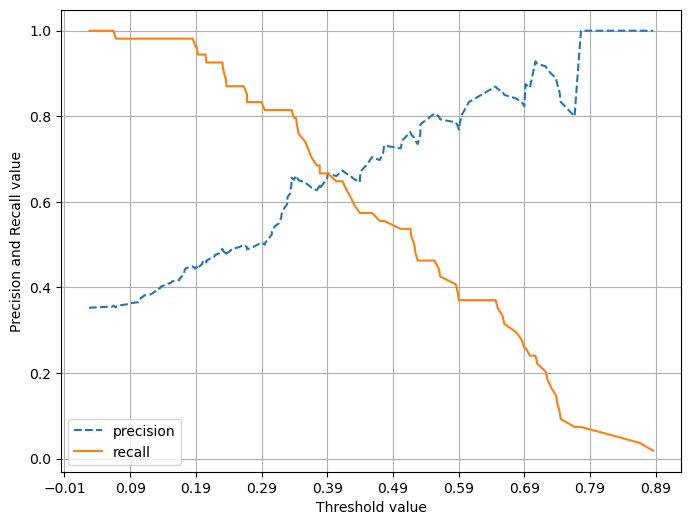

In [15]:
#양성예측율
precision_recall_curve_plot(y_test, pred_proba)

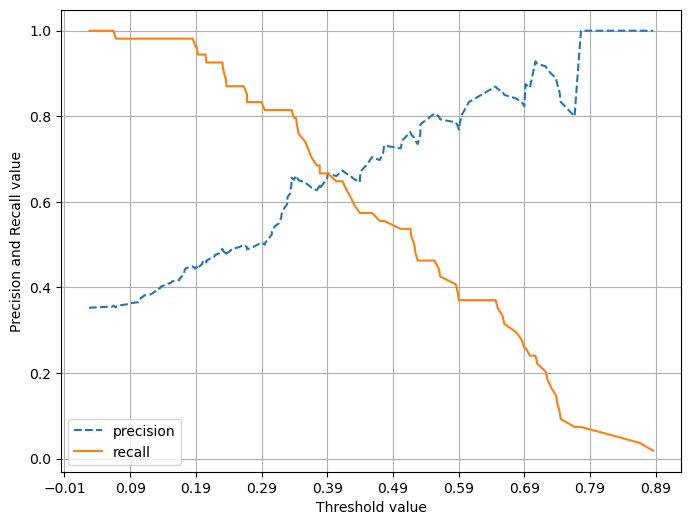

In [17]:
pred_proba1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba1)

In [18]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# zero 값 처리
zero_features = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI' ]

mean_df = diabetes_df[zero_features].mean()
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0,mean_df)


In [21]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# scaling

In [20]:
# scaling
y = diabetes_df.iloc[:, -1]
X = diabetes_df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150, stratify=y)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred, pred_proba)

혼동행렬 : 
[[88 12]
 [25 29]]
정확도 : 0.7597402597402597 정밀도 : 0.7073170731707317 재현율 : 0.5370370370370371 f1 : 0.6105263157894737 AUC : 0.7085185185185187


혼동행렬 : 
[[89 11]
 [25 29]]
정확도 : 0.7662337662337663 정밀도 : 0.725 재현율 : 0.5370370370370371 f1 : 0.6170212765957447 AUC : 0.7135185185185186

In [22]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [23]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
혼동행렬 : 
[[61 39]
 [10 44]]
정확도 : 0.6818181818181818 정밀도 : 0.5301204819277109 재현율 : 0.8148148148148148 f1 : 0.6423357664233577 AUC : 0.7124074074074074
임곗값: 0.33
혼동행렬 : 
[[68 32]
 [12 42]]
정확도 : 0.7142857142857143 정밀도 : 0.5675675675675675 재현율 : 0.7777777777777778 f1 : 0.65625 AUC : 0.7288888888888888
임곗값: 0.36
혼동행렬 : 
[[78 22]
 [18 36]]
정확도 : 0.7402597402597403 정밀도 : 0.6206896551724138 재현율 : 0.6666666666666666 f1 : 0.6428571428571429 AUC : 0.7233333333333333
임곗값: 0.39
혼동행렬 : 
[[80 20]
 [20 34]]
정확도 : 0.7402597402597403 정밀도 : 0.6296296296296297 재현율 : 0.6296296296296297 f1 : 0.6296296296296297 AUC : 0.7148148148148149
임곗값: 0.42
혼동행렬 : 
[[81 19]
 [25 29]]
정확도 : 0.7142857142857143 정밀도 : 0.6041666666666666 재현율 : 0.5370370370370371 f1 : 0.5686274509803921 AUC : 0.6735185185185186
임곗값: 0.45
혼동행렬 : 
[[84 16]
 [25 29]]
정확도 : 0.7337662337662337 정밀도 : 0.6444444444444445 재현율 : 0.5370370370370371 f1 : 0.5858585858585859 AUC : 0.6885185185185185
임곗값: 0.48
혼동행렬 : 
[[86 14]
 [25 29]]
정확도 : 0.7